In [109]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm
import keras as ks
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical



In [3]:
#randomise the set the image is taken from
type_select=random.randint(1,3)
if(type_select==3):
    db_set='val/'
elif(type_select==2):
    db_set='train/'
elif(type_select==1):
    db_set='test/'

In [4]:
#init image database path
db_path='./triple_mnist/'

#combine set with db path
set_path=db_path+db_set

#create list of all subfolders in set
sub_folders=os.listdir(set_path)

#init images array
imgs=[]

for i in range(5):
    #select random subfolder and get pathname
    subfolder=random.choice(sub_folders)
    subfolder_path = os.path.join(set_path, subfolder)

    #select random image and get pathname
    img=random.choice(os.listdir(subfolder_path))
    img_path=os.path.join(subfolder_path, img)

    #open image and add to array
    img=Image.open(img_path)
    imgs.append((img, subfolder))


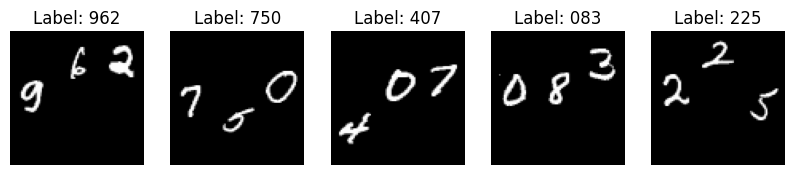

In [89]:
#display images using matplotlib
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(imgs, start=1):
    plt.subplot(1, len(imgs), i)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()


In [98]:
db_path='./triple_mnist/'

def flatten_toarray(set):
    set_path=db_path+set
    sub_folders=os.listdir(set_path)

    imgs=[]
    labels=[]

    for folder in sub_folders:
        subfolder_path = os.path.join(set_path, folder)

        for img_file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_file)

            flattened_img = (Image.open(img_path)).resize((45, 45))
            flattened_img = (np.array((flattened_img).convert('L')))

            imgs.append(flattened_img)
            labels.append(int(folder))



    return np.array(imgs), np.array(labels)


train_imgs, train_labels = flatten_toarray('train')
test_imgs, test_labels = flatten_toarray('test')
val_imgs, val_labels = flatten_toarray('val')

train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0
val_imgs = val_imgs / 255.0

In [99]:
all_imgs = np.vstack(((train_imgs, test_imgs, val_imgs)))
all_labels = np.vstack(((train_labels.reshape(train_labels.shape[0], -1), test_labels.reshape(test_labels.shape[0], -1),val_labels.reshape(val_labels.shape[0], -1))))

In [100]:
sp_train_imgs, sp_test_imgs, sp_train_labels, sp_test_labels = train_test_split(
    all_imgs, all_labels, test_size=0.2, random_state=42
)

sp_train_imgs, sp_val_imgs, sp_train_labels, sp_val_labels = train_test_split(
    sp_train_imgs, sp_train_labels, test_size=0.25, random_state=42
) 

print(f"Training set size: {train_imgs.shape[0]}")
print(f"Validation set size: {val_imgs.shape[0]}")
print(f"Test set size: {test_imgs.shape[0]}")

Training set size: 64000
Validation set size: 16000
Test set size: 20000


In [101]:
sp_log_reg = LogisticRegression(max_iter=1000)

sp_log_reg.fit(sp_train_imgs.reshape(sp_train_imgs.shape[0], -1), sp_train_labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [104]:
# Evaluate the model on the training set
sp_train_score = sp_log_reg.score(sp_train_imgs.reshape(sp_train_imgs.shape[0], -1), sp_train_labels)
print(f'Training Accuracy: {sp_train_score:.4f}')

# Evaluate the model on the validation set
sp_val_score = sp_log_reg.score(sp_val_imgs.reshape(sp_val_imgs.shape[0], -1), sp_val_labels)
print(f'Validation Accuracy: {sp_val_score:.4f}')

# Evaluate the model on the test set
sp_test_score = sp_log_reg.score(sp_test_imgs.reshape(sp_test_imgs.shape[0], -1), sp_test_labels)
print(f'Test Accuracy: {sp_test_score:.4f}')

Training Accuracy: 0.9497
Validation Accuracy: 0.0296
Test Accuracy: 0.0317


In [124]:
# Reshape the test images to match the input format of the model
sp_test_imgs_reshaped = sp_test_imgs.reshape(sp_test_imgs.shape[0], -1)

# Predict the labels for the test data
sp_test_predictions = sp_log_reg.predict(sp_test_imgs_reshaped)

# Compute and display accuracy
accuracy = accuracy_score(sp_test_labels, sp_test_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(sp_test_labels, sp_test_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(sp_test_labels, sp_test_predictions)

Accuracy: 0.03

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.05      0.04        20
           1       0.19      0.19      0.19        21
           2       0.08      0.03      0.05        30
           3       0.06      0.05      0.05        22
           4       0.25      0.17      0.21        23
           5       0.23      0.22      0.22        23
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        22
           8       0.04      0.07      0.05        15
           9       0.11      0.08      0.09        24
          10       0.17      0.24      0.20        17
          11       0.12      0.14      0.13        22
          12       0.10      0.09      0.10        22
          13       0.05      0.05      0.05        21
          14       0.18      0.10      0.12        21
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.0

True Positives (TP): 1
False Positives (FP): 24
True Negatives (TN): 19956
False Negatives (FN): 19
Accuracy: 0.9979
Precision: 0.0400
Recall: 0.0500
F1-Score: 0.0444


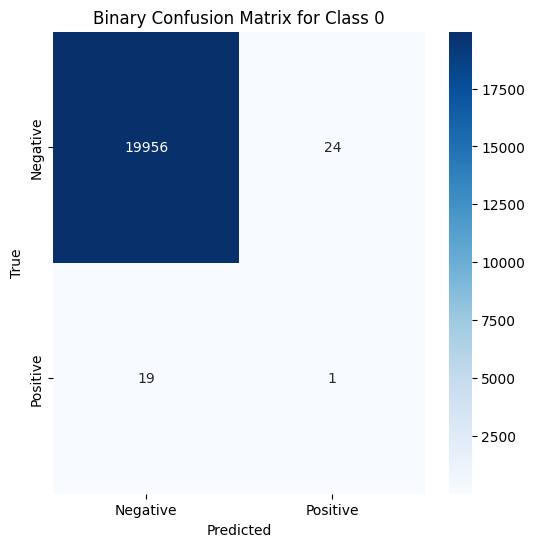

In [127]:
# Convert multi-class predictions to binary (positive = class '0')
def convert_to_binary(predictions, target_class=0):
    return (predictions == target_class).astype(int)

# Convert test predictions and labels to binary for the target class
binary_test_pred = convert_to_binary(sp_test_predictions, target_class=0)
binary_test_labels = convert_to_binary(sp_test_labels, target_class=0)

# Generate confusion matrix (binary)
conf_matrix = confusion_matrix(binary_test_labels, binary_test_pred)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Print the confusion matrix details
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Calculate accuracy and other metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Binary Confusion Matrix for Class 0')
plt.show()


In [9]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(train_imgs.reshape(train_imgs.shape[0], -1), train_labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [128]:
# Reshape the test images to match the input format of the model
test_imgs_reshaped = test_imgs.reshape(test_imgs.shape[0], -1)

# Predict the labels for the test data
test_pred = log_reg.predict(test_imgs_reshaped)

# Compute and display accuracy
accuracy = accuracy_score(test_labels, test_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred)

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.00

Classification Report:


ValueError: Mix of label input types (string and number)

In [16]:
# Step 1: Convert predictions to binary (correct/incorrect)
# We will assume "correct" is when the predicted label matches the true label.

# Create binary arrays: 1 for correct, 0 for incorrect
binary_test_pred = (test_pred == test_labels).astype(int)

# Now, compute the confusion matrix
conf_matrix = confusion_matrix(binary_test_pred, np.ones_like(binary_test_pred))

# Step 2: Calculate TP, FP, TN, FN from the confusion matrix
# The confusion matrix will look like:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix.ravel()

# Output the results
print(f'True Positives (TP): {tp}')
print(f'False Positives (FP): {fp}')
print(f'True Negatives (TN): {tn}')
print(f'False Negatives (FN): {fn}')

# Calculate accuracy as a bonus
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'Accuracy: {accuracy * 100:.2f}%')

True Positives (TP): 0
False Positives (FP): 20000
True Negatives (TN): 0
False Negatives (FN): 0
Accuracy: 0.00%


True Positives (TP): 0
False Positives (FP): 20000
True Negatives (TN): 0
False Negatives (FN): 0
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


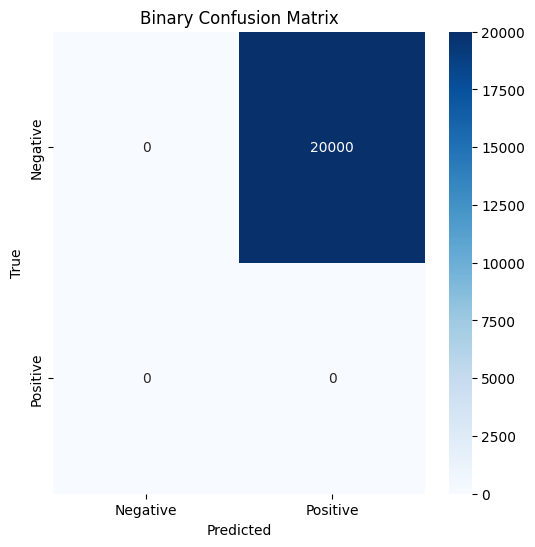

In [19]:
# Convert multi-class predictions to binary (positive = class '0')
def convert_to_binary(predictions, target_class=0):
    return (predictions == target_class).astype(int)

binary_test_pred = convert_to_binary(test_pred, target_class=0)
binary_test_labels = convert_to_binary(test_labels, target_class=0)

# Generate confusion matrix (binary)
conf_matrix = confusion_matrix(binary_test_labels, np.ones_like(binary_test_pred))

# Extract TP, FP, TN, FN
TP, FP, FN, TN = conf_matrix.ravel()

# Print the confusion matrix details
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Calculate accuracy and other metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Binary Confusion Matrix')
plt.show()

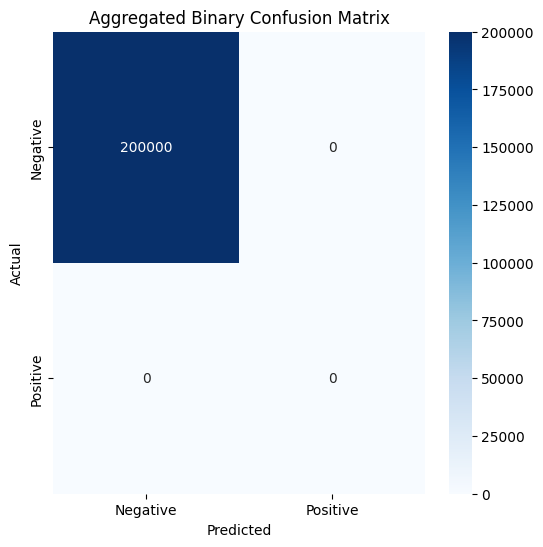

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to evaluate model and get predictions
def evaluate_model(model, data_loader, device, threshold=0.5):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.cpu().numpy()
            
            outputs = model(images).cpu().numpy()
            preds = (outputs >= threshold).astype(int)  # Apply threshold
            
            all_preds.append(preds)
            all_labels.append(labels)
    
    # Concatenate all batches
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)
    return all_labels, all_preds

# Evaluate on test data
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_labels, test_preds = evaluate_model(model, test_loader, device)

# Compute confusion matrix for each class
conf_matrices = multilabel_confusion_matrix(test_labels, test_preds)

# Aggregate confusion matrices into a single binary confusion matrix
aggregated_cm = conf_matrices.sum(axis=0)

# Extract values for visualization
tn, fp, fn, tp = aggregated_cm.ravel()

# Create binary confusion matrix
binary_conf_matrix = np.array([[tn, fp],
                                [fn, tp]])

# Plot binary confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(binary_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Aggregated Binary Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [55]:

# Evaluate on test set
model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        # Convert predictions to binary (0 or 1)
        predictions = (outputs > 0.5).float()
        
        # Calculate accuracy (exact matches)
        correct += (predictions == labels).all(dim=1).sum().item()
        total += labels.size(0)

print(f'\nTest Accuracy (exact matches): {100 * correct / total:.2f}%')

NameError: name 'device' is not defined

In [178]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1000, activation='softmax'))

# compile model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 43, 43, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 21, 21, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 3, 3, 64)        

In [180]:
# CNN Model Architecture (renamed to model2)
model2 = models.Sequential()

# Conv Layer Block 1
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

# Conv Layer Block 2
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

# Conv Layer Block 3
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

# Flatten the output of the last convolutional layer
model2.add(layers.Flatten())

# Fully Connected (Dense) Layer
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.5))

# Output Layer
model2.add(layers.Dense(1000, activation='softmax'))  

In [157]:
sp_cnn_train_imgs = sp_train_imgs[:, :, :, np.newaxis]
sp_cnn_val_imgs = sp_val_imgs[:, :, :, np.newaxis]
sp_cnn_test_imgs = sp_test_imgs[:, :, :, np.newaxis]

print(f"cnn_train_imgs shape: {sp_cnn_train_imgs.shape}")
print(f"cnn_test_imgs shape: {sp_cnn_val_imgs.shape}")


print(sp_train_labels.shape)
print(sp_val_labels.shape)

print(len(sp_train_labels))

cnn_train_imgs shape: (60000, 45, 45, 1)
cnn_test_imgs shape: (20000, 45, 45, 1)
(60000, 1)
(20000, 1)
60000


In [161]:
cnn_train_imgs = train_imgs[:, :, :, np.newaxis]
cnn_val_imgs = val_imgs[:, :, :, np.newaxis]
cnn_test_imgs = test_imgs[:, :, :, np.newaxis]

print(f"cnn_train_imgs shape: {cnn_train_imgs.shape}")
print(f"cnn_test_imgs shape: {cnn_val_imgs.shape}")


print(train_labels.shape)
print(val_labels.shape)

print(len(train_labels))

cnn_train_imgs shape: (64000, 45, 45, 1)
cnn_test_imgs shape: (16000, 45, 45, 1)
(64000,)
(16000,)
64000


In [181]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(sp_cnn_train_imgs, sp_train_labels, epochs=20, batch_size=64,
                    validation_data=(sp_cnn_val_imgs, sp_val_labels))

Epoch 1/20
938/938 [==============================] - 106s 111ms/step - loss: 6.4655 - accuracy: 0.0052 - val_loss: 5.0891 - val_accuracy: 0.0243
Epoch 2/20
938/938 [==============================] - 102s 108ms/step - loss: 4.0745 - accuracy: 0.0769 - val_loss: 2.9947 - val_accuracy: 0.1646
Epoch 3/20
938/938 [==============================] - 97s 103ms/step - loss: 2.9238 - accuracy: 0.1760 - val_loss: 2.4137 - val_accuracy: 0.2392
Epoch 4/20
938/938 [==============================] - 96s 103ms/step - loss: 2.4895 - accuracy: 0.2312 - val_loss: 2.1487 - val_accuracy: 0.2837
Epoch 5/20
938/938 [==============================] - 96s 103ms/step - loss: 2.2426 - accuracy: 0.2721 - val_loss: 1.9782 - val_accuracy: 0.3143
Epoch 6/20
938/938 [==============================] - 98s 104ms/step - loss: 2.0896 - accuracy: 0.2989 - val_loss: 1.8681 - val_accuracy: 0.3295
Epoch 7/20
938/938 [==============================] - 93s 99ms/step - loss: 1.9745 - accuracy: 0.3243 - val_loss: 1.7667 - val_a

In [183]:
score = model.evaluate(sp_cnn_test_imgs, sp_test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8411468863487244
Test accuracy: 0.7390999794006348
